In [1]:
import matplotlib.pyplot as plt
import os
import rioxarray
import re


In [2]:
# Importing the Lidar data (.tif files)
data_dir = "/share/gpu1/lshi/fathom/data/lidar/downloads_0p33arc"
tif_files = [file for file in os.listdir(data_dir) if file.endswith(".tif")]

print("Number of .tif files:", len(tif_files))

# Latitude and longitude boundaries for contiguous US
min_lat, max_lat = 24, 49
min_lon, max_lon = -125, -66

def is_contiguous_us(filename):
    match = re.search(r'n(\d+)w(\d+)|n(\d+)e(\d+)', filename)
    if match:
        lat = int(match.group(1) or match.group(3))
        lon = -int(match.group(2) or match.group(4)) if 'w' in filename else int(match.group(4))
        return min_lat <= lat <= max_lat and min_lon <= lon <= max_lon
    return False

# Filter files
contiguous_us_files = [f for f in tif_files if is_contiguous_us(f)]

# Output result
print("Contiguous US files:", contiguous_us_files)

print("After filtering:", len(contiguous_us_files))
contiguous_us_files[0:5]

Number of .tif files: 762
Contiguous US files: ['USGS_13_n25w081_20220406.tif', 'USGS_13_n26w081_20231221.tif', 'USGS_13_n26w098_20240925.tif', 'USGS_13_n26w082_20231221.tif', 'USGS_13_n26w099_20130911.tif', 'USGS_13_n27w098_20240925.tif', 'USGS_13_n27w082_20221103.tif', 'USGS_13_n27w099_20240925.tif', 'USGS_13_n27w081_20221103.tif', 'USGS_13_n27w083_20221103.tif', 'USGS_13_n28w083_20221103.tif', 'USGS_13_n28w081_20221103.tif', 'USGS_13_n28w082_20221103.tif', 'USGS_13_n28w099_20211103.tif', 'USGS_13_n28w097_20190730.tif', 'USGS_13_n29w097_20240229.tif', 'USGS_13_n29w098_20211103.tif', 'USGS_13_n29w082_20221103.tif', 'USGS_13_n29w081_20221103.tif', 'USGS_13_n29w099_20211103.tif', 'USGS_13_n28w098_20190730.tif', 'USGS_13_n29w096_20240229.tif', 'USGS_13_n30w097_20240229.tif', 'USGS_13_n30w096_20240229.tif', 'USGS_13_n30w091_20231213.tif', 'USGS_13_n30w092_20231101.tif', 'USGS_13_n30w095_20240229.tif', 'USGS_13_n29w090_20231213.tif', 'USGS_13_n30w090_20231213.tif', 'USGS_13_n29w083_2022110

['USGS_13_n25w081_20220406.tif',
 'USGS_13_n26w081_20231221.tif',
 'USGS_13_n26w098_20240925.tif',
 'USGS_13_n26w082_20231221.tif',
 'USGS_13_n26w099_20130911.tif']

In [3]:
# Load the first .tif file
tif1 = os.path.join(data_dir, contiguous_us_files[19])
tif1 = rioxarray.open_rasterio(tif1)

# Print original crs
print(tif1.rio.crs)

# Change the CRS to EPSG:3717
tif1 = tif1.rio.reproject("EPSG:3717")

print(tif1)

EPSG:4269
<xarray.DataArray (band: 1, y: 13350, x: 12328)> Size: 658MB
array([[[-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        ...,
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.]]], shape=(1, 13350, 12328), dtype=float32)
Coordinates:
  * x            (x) float64 99kB 2.874e+06 2.874e+06 ... 3.002e+06 3.002e+06
  * y            (y) float64 107kB 3.481e+06 3.481e+06 ... 3.342e+06 3.342e+06
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    BandDefinitionKeyword:  *
    DataType:               *
    AREA_OR_POINT:          Area
    DESCRIPTION:            *
  

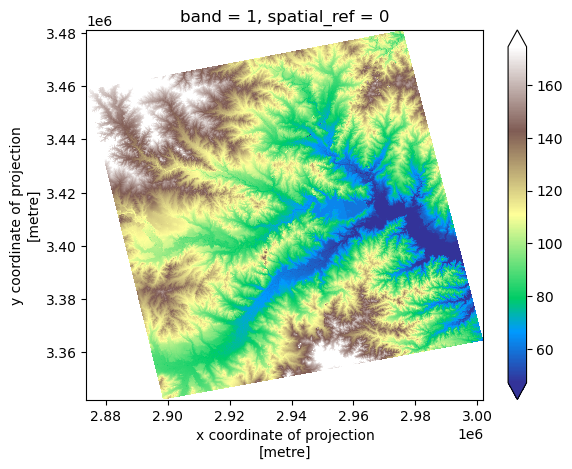

In [4]:
tif1 = tif1.where(tif1 >= -9999)
band1 = tif1.sel(band=1)
band1.plot(cmap='terrain', robust=True)
plt.show()

In [6]:
bounds1 = tif1.rio.bounds()
print(bounds1)

(2873774.421242352, 3342314.8406483796, 3001946.677227644, 3481112.6681470526)


In [11]:
# Load the second .tif file
tif2 = os.path.join(data_dir, contiguous_us_files[20])
tif2 = rioxarray.open_rasterio(tif2)

# Change the CRS to EPSG:3717
tif2 = tif2.rio.reproject("EPSG:3717")

# Get the bounds of the second .tif file
bounds2 = tif2.rio.bounds()

In [12]:
# Check for overlap
overlap = (
   bounds1[0] < bounds2[2] and
   bounds1[2] > bounds2[0] and
   bounds1[1] < bounds2[3] and
   bounds1[3] > bounds2[1]
)

print(f"Overlap: {overlap}")

Overlap: True


In [13]:
tif2

<xarray.DataArray (band: 1, y: 13335, x: 12394)> Size: 661MB
array([[[-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        ...,
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.],
        [-999999., -999999., -999999., ..., -999999., -999999.,
         -999999.]]], shape=(1, 13335, 12394), dtype=float32)
Coordinates:
  * x            (x) float64 99kB 3.002e+06 3.002e+06 ... 3.132e+06 3.132e+06
  * y            (y) float64 107kB 3.388e+06 3.388e+06 ... 3.248e+06 3.248e+06
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0
Attributes: (12/14)
    BandDefinitionKeyword:     *
    DataType:                  *
    AREA_OR_POINT:             Area
    LAYER_TYPE:                athematic
    RepresentationType:        *
    STATISTICS_MAXIMUM:        76.76717376709
    ...                        ...
    STATISTICS_STDDEV:         11.648448148883
    STATISTICS_VALID_PERCENT:  99.999
    scale_factor:              1.0
    add_offset:                0.0
    long_name:                 Layer_1
    _FillValue:                -999999.0

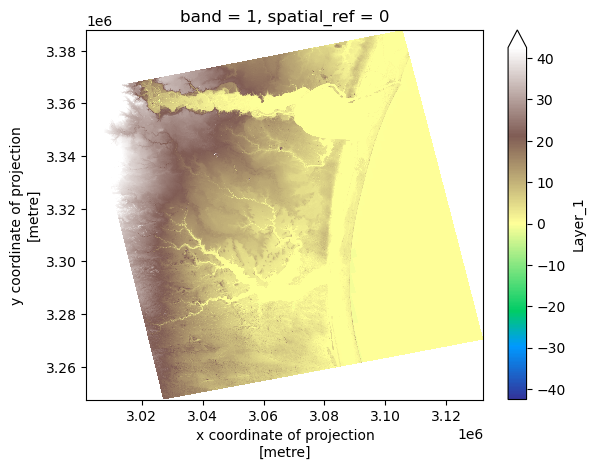

In [14]:
tif2 = tif2.where(tif2 >= -9999)
band1 = tif2.sel(band=1)
band1.plot(cmap='terrain', robust=True)
plt.show()

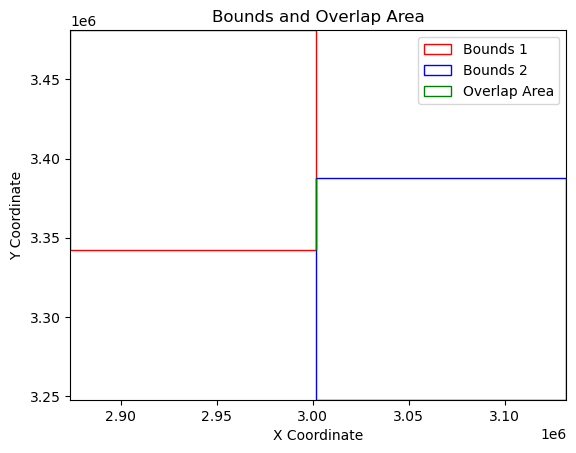

In [15]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

# Create rectangles for bounds1 and bounds2
rect1 = patches.Rectangle((bounds1[0], bounds1[1]), bounds1[2] - bounds1[0], bounds1[3] - bounds1[1], linewidth=1, edgecolor='r', facecolor='none', label='Bounds 1')
rect2 = patches.Rectangle((bounds2[0], bounds2[1]), bounds2[2] - bounds2[0], bounds2[3] - bounds2[1], linewidth=1, edgecolor='b', facecolor='none', label='Bounds 2')

# Add rectangles to the plot
ax.add_patch(rect1)
ax.add_patch(rect2)

# Calculate overlap area
if overlap:
   overlap_xmin = max(bounds1[0], bounds2[0])
   overlap_ymin = max(bounds1[1], bounds2[1])
   overlap_xmax = min(bounds1[2], bounds2[2])
   overlap_ymax = min(bounds1[3], bounds2[3])
   overlap_rect = patches.Rectangle((overlap_xmin, overlap_ymin), overlap_xmax - overlap_xmin, overlap_ymax - overlap_ymin, linewidth=1, edgecolor='g', facecolor='none', label='Overlap Area')
   ax.add_patch(overlap_rect)

# Set plot limits
ax.set_xlim(min(bounds1[0], bounds2[0]), max(bounds1[2], bounds2[2]))
ax.set_ylim(min(bounds1[1], bounds2[1]), max(bounds1[3], bounds2[3]))

# Add legend
ax.legend()

# Show plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Bounds and Overlap Area')
plt.show()